# <h1 style="color:Tomato;">Different Regression Algorithms</h1> 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge

from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor #To import consembling techniques
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Salary_dataset.csv',usecols=['YearsExperience','Salary'])
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<b>UNIVARIATE ANALYSIS

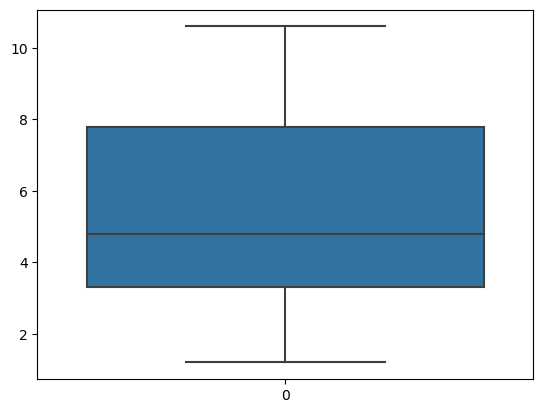

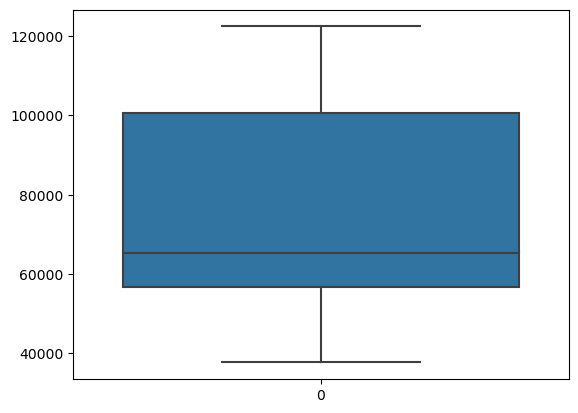

In [9]:
for i in df.columns:
    sns.boxplot(data =df[i])
    plt.show()

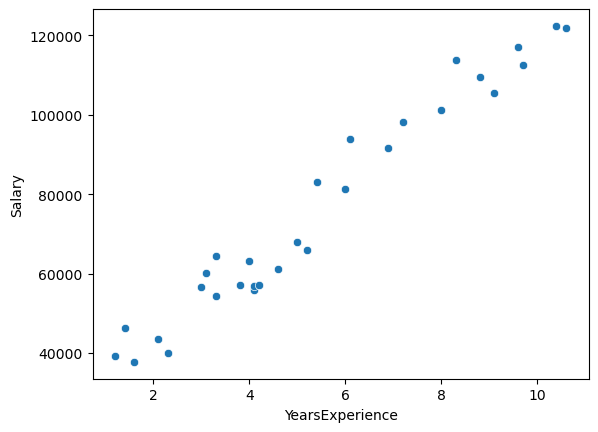

In [10]:
sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plt.show()

<AxesSubplot:>

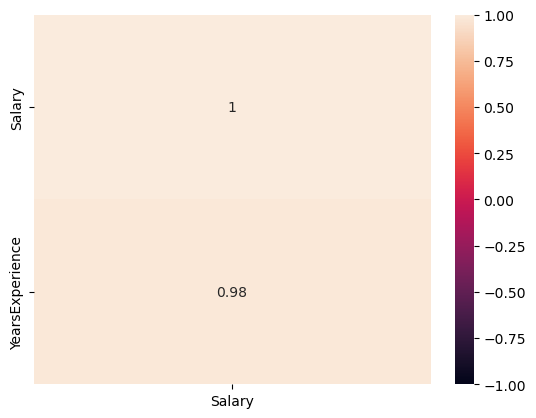

In [17]:
sns.heatmap(df.corr()[['Salary']].sort_values(by=['Salary'],ascending =False),vmin=-1,vmax=1, annot=True)

<b>Selecting features and Targets

In [33]:
x =df.iloc[:,:-1]
y=df.iloc[:,-1].values

In [35]:
y

array([ 39344.,  46206.,  37732.,  43526.,  39892.,  56643.,  60151.,
        54446.,  64446.,  57190.,  63219.,  55795.,  56958.,  57082.,
        61112.,  67939.,  66030.,  83089.,  81364.,  93941.,  91739.,
        98274., 101303., 113813., 109432., 105583., 116970., 112636.,
       122392., 121873.])

<b>Feature scaling

<b>Initialising Standard Scaler<b>

In [36]:
sc= StandardScaler()

In [39]:
x =sc.fit_transform(x)
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

<b>Splitting the data into training and testing set

In [41]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,shuffle= True)

<b> Ridge Regression

<b>Model Building`

In [43]:
model_ridge = Ridge()

In [44]:
model_ridge.fit(x_train,y_train)

Ridge()

In [45]:
y_pred= model_ridge.predict(x_test)

<b>Evaluating the accuracy

In [46]:
r2_score(y_test,y_pred)

0.8990753161815598

<b>Testing accuracy

In [49]:
model_ridge.score(x_train,y_train)

0.9631759940633963

In [50]:
model_ridge.score(x_test,y_test)

0.8990753161815598

In [52]:
mae =mean_absolute_error(y_test,y_pred)
mae

6197.852591589624

In [53]:
np.sqrt(mae)

78.72644150213843

 <b><p style="color:DodgerBlue;"> OUTPUT

In [57]:
output_ridge =pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Predicted'])
output

,Actual,Predicted
0,112636.0,114227.398242
1,67939.0,71601.169520
2,113813.0,101530.223729
3,83089.0,75228.933666
4,64446.0,56183.171897
5,57190.0,60717.877080


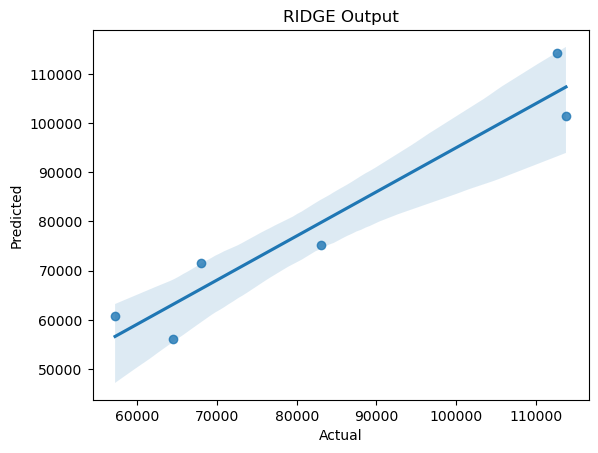

In [60]:
sns.regplot(data= output_ridge, x = 'Actual',y ='Predicted')
plt.title('RIDGE Output')
plt.show()

<b> LASSO REGRESSION

In [62]:
model_lasso =Lasso()

In [63]:
model_lasso.fit(x_train,y_train)

Lasso()

In [64]:
y_pred =model_lasso.predict(x_test)

In [66]:
r2_score(y_test,y_pred)

0.9024443319213069

In [67]:
model_lasso.score(x_train,y_train)

0.9645401561147614

In [68]:
model_lasso.score(x_test,y_test)

0.9024443319213069

In [70]:
mae = mean_absolute_error(y_test,y_pred)
mae

6286.369799988868

In [71]:
np.sqrt(mae)

79.28663065100488

In [73]:
output_lasso  = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Predicted'])
output_lasso

,Actual,Predicted
0,112636.0,115789.72697
1,67939.0,71499.37473
2,113813.0,102596.85609
3,83089.0,75268.76641
4,64446.0,55479.46009
5,57190.0,60191.19969


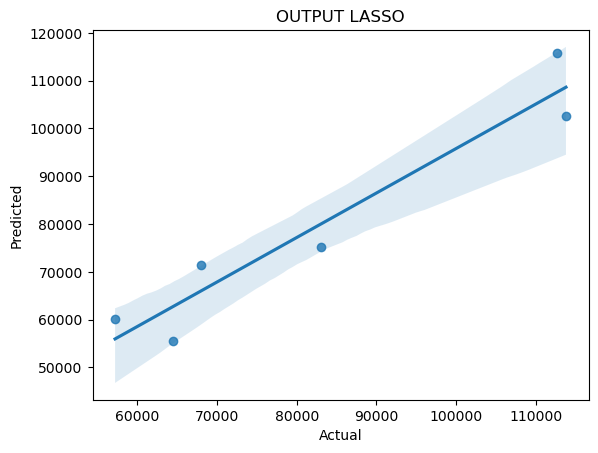

In [76]:
sns.regplot(data =output_lasso, x = 'Actual',y= 'Predicted')
plt.title('OUTPUT LASSO')
plt.show()

<b>ADABOOST REGRESSOR

In [80]:
model_adaboost = AdaBoostRegressor()

In [81]:
model_adaboost.fit(x_train,y_train)

AdaBoostRegressor()

In [83]:
y_pred =model_adaboost.predict(x_test)
y_pred

array([116970.        ,  65093.        , 101303.        ,  66030.        ,
        58079.5       ,  59936.33333333])

In [86]:
r2_score(y_test,y_pred)

0.8295250355218282

In [89]:
model_adaboost.score(x_train,y_train)

0.9940709603654566

In [90]:
model_adaboost.score(x_test,y_test)

0.8295250355218282

In [92]:
mae= mean_absolute_error(y_test,y_pred)
mae

7643.63888888889

In [93]:
np.sqrt(mae)

87.42790680834632

In [95]:
output = pd.DataFrame(zip(y_test,y_pred),columns=['Actual','Predicted'])
output

,Actual,Predicted
0,112636.0,116970.000000
1,67939.0,65093.000000
2,113813.0,101303.000000
3,83089.0,66030.000000
4,64446.0,58079.500000
5,57190.0,59936.333333


In [ ]:
sns.